In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn import metrics
from scipy import stats

In [2]:
# this function would impute random integers between the mean-std and mean+std in the missing values of the given column of the given dataframe
def impute_missing(df,x):
    x_mean   = round(df[x].mean())
    x_std    = round(df[x].std())
    null     = df[x].isnull().sum()
    random_x = list(np.random.randint(x_mean-x_std,x_mean+x_std,size=null))
    df[x][np.isnan(df[x])] = random_x

In [3]:
df1=pd.read_csv(r"CREDIT CARD USERS DATA.csv")
df=df1.copy()
df.head()

C:\Users\DELL\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3044: DtypeWarning: Columns (2,19,21,49,87,88,102) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,custid,region,townsize,gender,age,agecat,birthmonth,ed,edcat,jobcat,...,owncd,ownpda,ownpc,ownipod,owngame,ownfax,news,response_01,response_02,response_03
0,3964-QJWTRG-NPN,1.0,2.00,1.0,20.0,2.0,September,15.0,3.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0648-AIPJSP-UVM,5.0,5.00,0.0,22.0,2.0,May,17.0,4.0,2.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0
2,5195-TLUDJE-HVO,3.0,4.00,1.0,67.0,6.0,June,14.0,2.0,2.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,4459-VLPQUH-3OL,4.0,3.00,0.0,23.0,2.0,May,16.0,3.0,2.0,...,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0
4,8158-SMTQFB-CNO,2.0,2.00,0.0,26.0,3.0,July,16.0,3.0,2.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [4]:
# this column needs to be predicted(primary card spent + secondary card spent)

df['Total_Cardspent']=df['cardspent']+df['card2spent']

df.drop(['cardspent','card2spent'],axis=1,inplace=True)

# Handling Missing Values

In [5]:
# the null values in the data have been imputed with #NULL, thus replacing them with np.nan
df.replace(to_replace="#NULL!",value=np.nan,inplace=True)
df.isnull().sum().any()

True

In [6]:
null_data = pd.DataFrame(df.isnull().sum().sort_values(ascending=False),columns=['Total_Null'])
null_data['percentage'] = (df.isnull().sum().sort_values(ascending=False)/df.shape[0]) * 100

null_data.head(16)

,Total_Null,percentage
lnwireten,3656,73.12
lnwiremon,3656,73.12
lnequipmon,3296,65.92
lnequipten,3296,65.92
lntollten,2622,52.44
lntollmon,2622,52.44
lncardten,1422,28.44
lncardmon,1419,28.38
lnlongten,3,0.06
longten,3,0.06


In [7]:
# I am dropping the columns having 'ln' in them as they are natural logged of some columns, having large missing values.
# These are the columns only increasing multicollinearity among the predictors .Thus I am dropping them.
a=[]
for x in df.columns:
    if 'ln' in x:
        a.append(x)
        
df.drop(a,axis=1,inplace=True)

In [8]:
df.columns.values

array(['custid', 'region', 'townsize', 'gender', 'age', 'agecat',
       'birthmonth', 'ed', 'edcat', 'jobcat', 'union', 'employ', 'empcat',
       'retire', 'income', 'inccat', 'debtinc', 'creddebt', 'othdebt',
       'default', 'jobsat', 'marital', 'spoused', 'spousedcat', 'reside',
       'pets', 'pets_cats', 'pets_dogs', 'pets_birds', 'pets_reptiles',
       'pets_small', 'pets_saltfish', 'pets_freshfish', 'homeown',
       'hometype', 'address', 'addresscat', 'cars', 'carown', 'cartype',
       'carvalue', 'carcatvalue', 'carbought', 'carbuy', 'commute',
       'commutecat', 'commutetime', 'commutecar', 'commutemotorcycle',
       'commutecarpool', 'commutebus', 'commuterail', 'commutepublic',
       'commutebike', 'commutewalk', 'commutenonmotor', 'telecommute',
       'reason', 'polview', 'polparty', 'polcontrib', 'vote', 'card',
       'cardtype', 'cardbenefit', 'cardfee', 'cardtenure',
       'cardtenurecat', 'card2', 'card2type', 'card2benefit', 'card2fee',
       'card2tenur

In [9]:
null_data = pd.DataFrame(df.isnull().sum().sort_values(ascending=False),columns=['Total_Null'])
null_data['percentage'] = (df.isnull().sum().sort_values(ascending=False)/df.shape[0]) * 100

null_data.head(16)

,Total_Null,percentage
longten,3,0.06
townsize,2,0.04
cardten,2,0.04
commutetime,2,0.04
Total_Cardspent,0,0.00
carcatvalue,0,0.00
pets_saltfish,0,0.00
pets_freshfish,0,0.00
homeown,0,0.00
hometype,0,0.00


In [10]:
# Townsize column is having some problems, thus handling this problem
df.townsize.map({1.00:1.0,2.00:2.0,3.00:3.0,4.00:4.0,5.00:5.0})
df.townsize.value_counts()

1.00    1181
2.00     841
3.00     734
4.00     712
5.00     626
1.0      255
2.0      207
3.0      173
4.0      145
5.0      124
Name: townsize, dtype: int64

In [11]:
# converting them to numeric type so as to fill the missing values
# coerce would fill errors with np.nan

df['longten']=pd.to_numeric(df['longten'],errors='coerce')
df['commutetime'] = pd.to_numeric(df['commutetime'],errors='coerce')
df['townsize'] = pd.to_numeric(df['townsize'],errors='coerce')
df['cardten'] = pd.to_numeric(df['cardten'],errors='coerce')


# Now imputing values into these columns
impute_missing(df,'longten')
impute_missing(df,'commutetime')
impute_missing(df,'townsize')
impute_missing(df,'cardten')

C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [12]:
#hence we removed all the missing values 
df.isnull().sum().any()

False

# Checking for outliers

In [13]:
# Making Custid as the Index of the dataframe 
df.set_index(df['custid'],inplace=True)
df.drop(['custid'],axis=1,inplace=True)

In [14]:
def var_summary(x):
   return pd.Series([x.count(), x.isnull().sum(), x.sum(), x.mean(), x.median(),  x.std(), x.var(), x.min(), x.dropna().quantile(0.01), x.dropna().quantile(0.05),x.dropna().quantile(0.10),x.dropna().quantile(0.25),x.dropna().quantile(0.50),x.dropna().quantile(0.75), x.dropna().quantile(0.90),x.dropna().quantile(0.95), x.dropna().quantile(0.99),x.max()], 
                 index=['N', 'NMISS', 'SUM', 'MEAN','MEDIAN', 'STD', 'VAR', 'MIN', 'P1' , 'P5' ,'P10' ,'P25' ,'P50' ,'P75' ,'P90' ,'P95' ,'P99' ,'MAX'])

num_summary=df.drop(['birthmonth'],axis=1).apply(lambda x: var_summary(x)).T
num_summary

,N,NMISS,SUM,MEAN,MEDIAN,STD,VAR,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
region,5000.0,0.0,15007.00,3.001400,3.00,1.421760,2.021402e+00,1.00,1.0000,1.000,1.000,2.0000,3.00,4.0000,5.000,5.0000,5.0000,5.00
townsize,5000.0,0.0,13435.00,2.687000,3.00,1.425706,2.032638e+00,1.00,1.0000,1.000,1.000,1.0000,3.00,4.0000,5.000,5.0000,5.0000,5.00
gender,5000.0,0.0,2518.00,0.503600,1.00,0.500037,2.500370e-01,0.00,0.0000,0.000,0.000,0.0000,1.00,1.0000,1.000,1.0000,1.0000,1.00
age,5000.0,0.0,235128.00,47.025600,47.00,17.770338,3.157849e+02,18.00,18.0000,20.000,23.000,31.0000,47.00,62.0000,72.000,76.0000,79.0000,79.00
agecat,5000.0,0.0,21194.00,4.238800,4.00,1.308785,1.712917e+00,2.00,2.0000,2.000,2.000,3.0000,4.00,5.0000,6.000,6.0000,6.0000,6.00
ed,5000.0,0.0,72715.00,14.543000,14.00,3.281083,1.076550e+01,6.00,8.0000,9.000,10.000,12.0000,14.00,17.0000,19.000,20.0000,21.0000,23.00
edcat,5000.0,0.0,13360.00,2.672000,2.00,1.211738,1.468310e+00,1.00,1.0000,1.000,1.000,2.0000,2.00,4.0000,4.000,5.0000,5.0000,5.00
jobcat,5000.0,0.0,13764.00,2.752800,2.00,1.737900,3.020296e+00,1.00,1.0000,1.000,1.000,1.0000,2.00,4.0000,6.000,6.0000,6.0000,6.00
union,5000.0,0.0,756.00,0.151200,0.00,0.358280,1.283642e-01,0.00,0.0000,0.000,0.000,0.0000,0.00,0.0000,1.000,1.0000,1.0000,1.00
employ,5000.0,0.0,48652.00,9.730400,7.00,9.690929,9.391410e+01,0.00,0.0000,0.000,0.000,2.0000,7.00,15.0000,25.000,31.0000,39.0000,52.00


In [15]:
# outlier columns are the name of the columns having outliers 
# since we can't remove outliers from out target variable,that is why i'am removing "Total_Cardspent" from the list.

outlier_columns = list(num_summary[num_summary['MAX']>num_summary['P99']].index)
outlier_columns.remove('Total_Cardspent')

outlier_columns

['ed',
 'employ',
 'income',
 'debtinc',
 'creddebt',
 'othdebt',
 'spoused',
 'reside',
 'pets',
 'pets_cats',
 'pets_dogs',
 'pets_birds',
 'pets_reptiles',
 'pets_small',
 'pets_saltfish',
 'pets_freshfish',
 'address',
 'cars',
 'carvalue',
 'commutetime',
 'carditems',
 'card2items',
 'longmon',
 'longten',
 'tollmon',
 'tollten',
 'equipmon',
 'equipten',
 'cardmon',
 'cardten',
 'wiremon',
 'wireten',
 'hourstv']

In [16]:
# For Removing Outliers 
for x in outlier_columns:
    df[x]=df[x].clip_upper(df[x].quantile(0.99))
    df[x]=df[x].clip_lower(df[x].quantile(0.01))

C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: clip_upper(threshold) is deprecated, use clip(upper=threshold) instead
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: clip_lower(threshold) is deprecated, use clip(lower=threshold) instead
  after removing the cwd from sys.path.


In [17]:
removed_outliers = df.drop(['birthmonth'],axis=1).apply(lambda x: var_summary(x)).T
removed_outliers[removed_outliers['MAX']>removed_outliers['P99']]

# now You can see that the outliers are removed upto some extent

,N,NMISS,SUM,MEAN,MEDIAN,STD,VAR,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
income,5000.0,0.0,268149.500,53.629900,38.00,46.567698,2168.550537,9.00,9.0000,13.0000,16.000,24.0000,38.00,67.0000,109.100,147.0000,272.000100,272.0100
creddebt,5000.0,0.0,8791.860,1.758372,0.93,2.380783,5.668128,0.03,0.0300,0.1000,0.180,0.3900,0.93,2.0600,4.300,6.3715,14.280004,14.2804
othdebt,5000.0,0.0,17612.160,3.522432,2.10,4.221718,17.822902,0.11,0.1100,0.2900,0.460,0.9800,2.10,4.3100,8.060,11.8120,24.060018,24.0618
carvalue,5000.0,0.0,116011.150,23.202230,17.00,21.129844,446.470311,-1.00,-1.0000,-1.0000,2.490,9.2000,17.00,31.1000,52.910,72.0000,92.000010,92.0010
commutetime,5000.0,0.0,126653.500,25.330700,25.00,5.754586,33.115262,13.00,13.0000,16.0000,18.000,21.0000,25.00,29.0000,33.000,35.0000,40.000100,40.0100
longmon,5000.0,0.0,66363.200,13.272640,9.55,11.551690,133.441533,1.85,1.8500,2.9000,3.700,5.7000,9.55,16.5500,27.000,36.7575,65.200010,65.2010
longten,5000.0,0.0,3472930.675,694.586135,350.20,892.714755,796939.634442,2.40,2.4000,12.6425,28.335,104.6375,350.20,914.4875,1808.810,2565.9250,4687.703415,4688.0415
tollmon,5000.0,0.0,65700.375,13.140075,0.00,15.811442,250.001704,0.00,0.0000,0.0000,0.000,0.0000,0.00,24.5000,35.500,43.5000,58.750025,58.7525
tollten,5000.0,0.0,2850650.975,570.130195,0.00,914.744043,836756.664877,0.00,0.0000,0.0000,0.000,0.0000,0.00,885.4500,1918.955,2620.2125,3977.151205,3977.2705
equipmon,5000.0,0.0,64543.575,12.908715,0.00,18.955975,359.328975,0.00,0.0000,0.0000,0.000,0.0000,0.00,30.8000,42.700,49.0525,63.300005,63.3005


In [18]:
# Hence Outliers have been handled.

# Insights 

In [19]:
df.columns.values

array(['region', 'townsize', 'gender', 'age', 'agecat', 'birthmonth',
       'ed', 'edcat', 'jobcat', 'union', 'employ', 'empcat', 'retire',
       'income', 'inccat', 'debtinc', 'creddebt', 'othdebt', 'default',
       'jobsat', 'marital', 'spoused', 'spousedcat', 'reside', 'pets',
       'pets_cats', 'pets_dogs', 'pets_birds', 'pets_reptiles',
       'pets_small', 'pets_saltfish', 'pets_freshfish', 'homeown',
       'hometype', 'address', 'addresscat', 'cars', 'carown', 'cartype',
       'carvalue', 'carcatvalue', 'carbought', 'carbuy', 'commute',
       'commutecat', 'commutetime', 'commutecar', 'commutemotorcycle',
       'commutecarpool', 'commutebus', 'commuterail', 'commutepublic',
       'commutebike', 'commutewalk', 'commutenonmotor', 'telecommute',
       'reason', 'polview', 'polparty', 'polcontrib', 'vote', 'card',
       'cardtype', 'cardbenefit', 'cardfee', 'cardtenure',
       'cardtenurecat', 'card2', 'card2type', 'card2benefit', 'card2fee',
       'card2tenure', 'card2

Text(0, 0.5, 'Total_cardspent')

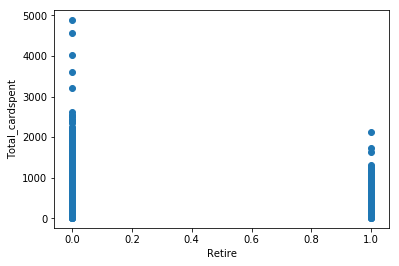

In [20]:
plt.scatter(df['retire'],df['Total_Cardspent'])
plt.xlabel("Retire")
plt.ylabel('Total_cardspent')
# Not Retired Users was spending more than retired Users

Text(0, 0.5, 'Total_carspent')

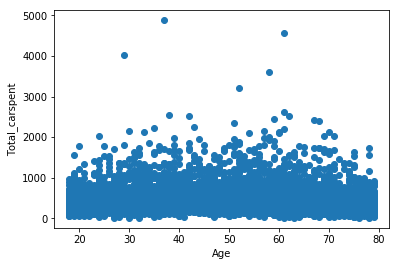

In [21]:
plt.scatter(df['age'],df['Total_Cardspent'])
plt.xlabel("Age")
plt.ylabel("Total_carspent")
# 40-50 aged people spent more on credit card than others.

Text(0, 0.5, 'Total_carspent')

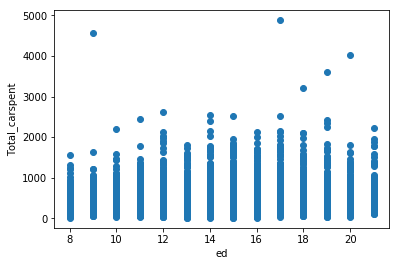

In [22]:
plt.scatter(df['ed'],df['Total_Cardspent'])
plt.xlabel("ed")
plt.ylabel("Total_carspent")

Text(0, 0.5, 'Total_carspent')

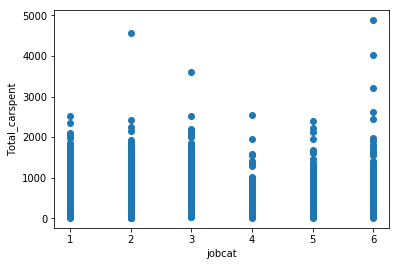

In [23]:
plt.scatter(df['jobcat'],df['Total_Cardspent'])
plt.xlabel("jobcat")
plt.ylabel("Total_carspent")

#All the job category were having approximately same spent over credit cards.

Text(0, 0.5, 'Total_carspent')

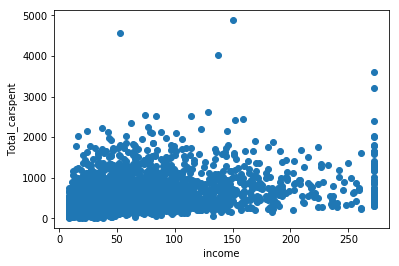

In [24]:
plt.scatter(df['income'],df['Total_Cardspent'])
plt.xlabel("income")
plt.ylabel("Total_carspent")

#Users having a high income, spent more on credit cards.

Text(0, 0.5, 'Total_carspent')

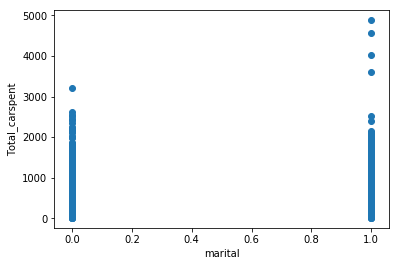

In [25]:
plt.scatter(df['marital'],df['Total_Cardspent'])
plt.xlabel("marital")
plt.ylabel("Total_carspent")

# Maried Users spent more than non-married Users.

[None]

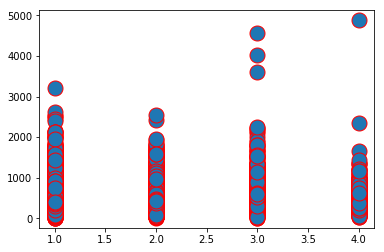

In [26]:
l=plt.plot(df['hometype'],df['Total_Cardspent'],'ro')
plt.setp(l, markersize=15)
plt.setp(l, markerfacecolor='C0')

#It is unusual but single family was found to be more spending as compared to other Family types.

# Getting the numeric and categorical columns in seperate

In [27]:
# According to data dictionary given, these columns are said to be ordinal. We would be creating dummies for them too.
categorical_data = ['default',
 'townsize',
 'ownpda',
 'wireless',
 'card2tenure',
 'card2',
 'ownvcr',
 'card',
 'callid',
 'pager',
 'tollfree',
 'internet',
 'region',
 'reason',
 'ownpc',
 'polcontrib',
 'commutebike',
 'marital',
 'response_03',
 'callwait',
 'commutepublic',
 'bfast',
 'commutecat',
 'commutemotorcycle',
 'carcatvalue',
 'telecommute',
 'owndvd',
 'commuterail',
 'owngame',
 'card2fee',
 'inccat',
 'addresscat',
 'agecat',
 'commutenonmotor',
 'ownipod',
 'ebill',
 'commutewalk',
 'card2benefit',
 'vote',
 'spousedcat',
 'empcat',
 'cardtype',
 'multline',
 'birthmonth',
 'homeown',
 'retire',
 'equip',
 'commutecarpool',
 'cardtenurecat',
 'cars',
 'hometype',
 'cardfee',
 'forward',
 'cardtenure',
 'callcard',
 'churn',
 'union',
 'carbought',
 'confer',
 'edcat',
 'card2tenurecat',
 'response_01',
 'jobsat',
 'commutecar',
 'cartype',
 'ownfax',
 'news',
 'active',
 'carown',
 'owncd',
 'polview',
 'employ',
 'gender',
 'commutebus',
 'commute',
 'owntv',
 'address',
 'voice',
 'jobcat',
 'card2type',
 'polparty',
 'response_02',
 'cardbenefit',
 'carbuy']

In [28]:
df_cat = df.loc[:,categorical_data]
df_cat.head()

,default,townsize,ownpda,wireless,card2tenure,card2,ownvcr,card,callid,pager,...,commute,owntv,address,voice,jobcat,card2type,polparty,response_02,cardbenefit,carbuy
custid,,,,,,,,,,,,,,,,,,,,,
3964-QJWTRG-NPN,1.0,2.0,0.0,0.0,3.0,5.0,1.0,3.0,0.0,1.0,...,8.0,1.0,0.0,1.0,1.0,3.0,1.0,1.0,1.0,0.0
0648-AIPJSP-UVM,1.0,5.0,1.0,1.0,4.0,4.0,1.0,2.0,1.0,1.0,...,1.0,1.0,2.0,1.0,2.0,1.0,1.0,0.0,1.0,0.0
5195-TLUDJE-HVO,0.0,4.0,0.0,0.0,25.0,4.0,1.0,2.0,0.0,0.0,...,4.0,1.0,30.0,0.0,2.0,1.0,1.0,0.0,4.0,1.0
4459-VLPQUH-3OL,1.0,3.0,0.0,0.0,5.0,3.0,1.0,2.0,0.0,0.0,...,1.0,1.0,3.0,0.0,2.0,2.0,0.0,0.0,4.0,1.0
8158-SMTQFB-CNO,0.0,2.0,0.0,1.0,9.0,1.0,1.0,4.0,1.0,0.0,...,6.0,1.0,3.0,1.0,2.0,3.0,0.0,1.0,1.0,1.0


In [29]:
df_cat.columns

Index(['default', 'townsize', 'ownpda', 'wireless', 'card2tenure', 'card2',
       'ownvcr', 'card', 'callid', 'pager', 'tollfree', 'internet', 'region',
       'reason', 'ownpc', 'polcontrib', 'commutebike', 'marital',
       'response_03', 'callwait', 'commutepublic', 'bfast', 'commutecat',
       'commutemotorcycle', 'carcatvalue', 'telecommute', 'owndvd',
       'commuterail', 'owngame', 'card2fee', 'inccat', 'addresscat', 'agecat',
       'commutenonmotor', 'ownipod', 'ebill', 'commutewalk', 'card2benefit',
       'vote', 'spousedcat', 'empcat', 'cardtype', 'multline', 'birthmonth',
       'homeown', 'retire', 'equip', 'commutecarpool', 'cardtenurecat', 'cars',
       'hometype', 'cardfee', 'forward', 'cardtenure', 'callcard', 'churn',
       'union', 'carbought', 'confer', 'edcat', 'card2tenurecat',
       'response_01', 'jobsat', 'commutecar', 'cartype', 'ownfax', 'news',
       'active', 'carown', 'owncd', 'polview', 'employ', 'gender',
       'commutebus', 'commute', 'owntv', 

In [30]:
df_cat1 = pd.get_dummies(data=df_cat,columns=df_cat.columns)

In [31]:
from sklearn.feature_selection import mutual_info_regression

mutual_information = mutual_info_regression(df_cat1,df['Total_Cardspent'])
selected_cat = pd.DataFrame({'columns':df_cat1.columns,'mutual_information':mutual_information})


selected_cat

C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype uint8 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


,columns,mutual_information
0,default_0.0,0.003744
1,default_1.0,0.003640
2,townsize_1.0,0.004394
3,townsize_2.0,0.003089
4,townsize_3.0,0.001572
5,townsize_4.0,0.003975
6,townsize_5.0,0.007259
7,ownpda_0.0,0.006173
8,ownpda_1.0,0.006160
9,wireless_0.0,0.006576


In [32]:
selected_categorical = list(selected_cat[selected_cat['mutual_information']==0]['columns'])

selected_categorical

['card2tenure_1.0',
 'card2tenure_4.0',
 'card2tenure_8.0',
 'card2tenure_12.0',
 'card2tenure_13.0',
 'card2tenure_14.0',
 'card2tenure_18.0',
 'card2tenure_21.0',
 'card2tenure_22.0',
 'card2tenure_25.0',
 'card2tenure_28.0',
 'card2tenure_29.0',
 'card2_4.0',
 'card_4.0',
 'card_5.0',
 'pager_0.0',
 'pager_1.0',
 'tollfree_0.0',
 'tollfree_1.0',
 'internet_2.0',
 'internet_4.0',
 'region_1.0',
 'region_3.0',
 'region_5.0',
 'polcontrib_0.0',
 'polcontrib_1.0',
 'commutebike_0.0',
 'commutebike_1.0',
 'marital_0.0',
 'marital_1.0',
 'response_03_0.0',
 'response_03_1.0',
 'bfast_1.0',
 'commutecat_1.0',
 'commutecat_3.0',
 'commutecat_5.0',
 'commutemotorcycle_0.0',
 'commutemotorcycle_1.0',
 'commuterail_0.0',
 'commuterail_1.0',
 'owngame_0.0',
 'owngame_1.0',
 'ebill_0.0',
 'ebill_1.0',
 'commutewalk_0.0',
 'commutewalk_1.0',
 'card2benefit_3.0',
 'spousedcat_-1.0',
 'spousedcat_3.0',
 'empcat_2.0',
 'cardtype_1.0',
 'cardtype_2.0',
 'birthmonth_April',
 'birthmonth_August',
 'bir

In [33]:
df_cat_final = df_cat1.loc[:,selected_categorical]
df_cat_final.head()

,card2tenure_1.0,card2tenure_4.0,card2tenure_8.0,card2tenure_12.0,card2tenure_13.0,card2tenure_14.0,card2tenure_18.0,card2tenure_21.0,card2tenure_22.0,card2tenure_25.0,...,jobcat_1.0,jobcat_3.0,jobcat_4.0,jobcat_5.0,card2type_1.0,polparty_0.0,polparty_1.0,response_02_0.0,response_02_1.0,cardbenefit_2.0
custid,,,,,,,,,,,,,,,,,,,,,
3964-QJWTRG-NPN,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,1,0
0648-AIPJSP-UVM,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,1,0,0
5195-TLUDJE-HVO,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,1,1,0,0
4459-VLPQUH-3OL,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
8158-SMTQFB-CNO,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0


In [34]:
# getting the numerical columns in seperate
df_num = df.loc[:,df.columns.difference(df_cat.columns)]
df_num.head()

,Total_Cardspent,age,card2items,carditems,cardmon,cardten,carvalue,commutetime,creddebt,debtinc,...,pets_reptiles,pets_saltfish,pets_small,reside,spoused,tenure,tollmon,tollten,wiremon,wireten
custid,,,,,,,,,,,,,,,,,,,,,
3964-QJWTRG-NPN,149.46,20.0,4.0,5.0,14.25,60.0,14.3,22.0,1.20,11.1,...,0.0,0.0,0.0,3.0,-1.0,5.0,29.0,161.05,0.00,0.00
0648-AIPJSP-UVM,77.54,22.0,2.0,5.0,16.00,610.0,6.8,29.0,1.22,18.6,...,0.0,0.0,0.0,2.0,-1.0,39.0,0.0,0.00,45.65,1683.55
5195-TLUDJE-HVO,359.97,67.0,7.0,9.0,23.00,1410.0,18.8,24.0,0.93,9.9,...,0.0,0.0,0.0,3.0,13.0,65.0,0.0,0.00,0.00,0.00
4459-VLPQUH-3OL,359.41,23.0,1.0,17.0,21.00,685.0,8.7,38.0,0.03,5.7,...,0.0,0.0,0.0,5.0,18.0,36.0,0.0,0.00,0.00,0.00
8158-SMTQFB-CNO,507.83,26.0,7.0,8.0,17.25,360.0,10.6,32.0,0.21,1.7,...,0.0,0.0,0.0,4.0,13.0,21.0,16.5,387.70,19.05,410.80


In [35]:
statistic = []
p_value = []
for x in df_num.drop(['Total_Cardspent'],axis=1).columns:
    a,b = stats.pearsonr(df_num[x],df_num['Total_Cardspent'])
    statistic.append(a)
    p_value.append(b)

In [36]:
pearson = pd.DataFrame({'Columns':df_num.drop(['Total_Cardspent'],axis=1).columns,'statstic':statistic,'p_value':p_value})
pearson

,Columns,statstic,p_value
0,age,0.030848,2.916234e-02
1,card2items,0.404940,1.170621e-196
2,carditems,0.391583,6.421345e-183
3,cardmon,0.033259,1.867988e-02
4,cardten,0.046234,1.074719e-03
5,carvalue,0.316141,1.861847e-116
6,commutetime,-0.001990,8.880979e-01
7,creddebt,0.248729,2.213860e-71
8,debtinc,0.018075,2.012975e-01
9,ed,0.098090,3.625213e-12


In [37]:
selected_num = list(pearson[pearson['p_value']<0.05]['Columns'])
selected_num

['age',
 'card2items',
 'carditems',
 'cardmon',
 'cardten',
 'carvalue',
 'creddebt',
 'ed',
 'equipmon',
 'equipten',
 'hourstv',
 'income',
 'longmon',
 'longten',
 'othdebt',
 'spoused',
 'tenure',
 'tollmon',
 'tollten',
 'wiremon',
 'wireten']

In [38]:
selected_num.append('Total_Cardspent')
selected_num

['age',
 'card2items',
 'carditems',
 'cardmon',
 'cardten',
 'carvalue',
 'creddebt',
 'ed',
 'equipmon',
 'equipten',
 'hourstv',
 'income',
 'longmon',
 'longten',
 'othdebt',
 'spoused',
 'tenure',
 'tollmon',
 'tollten',
 'wiremon',
 'wireten',
 'Total_Cardspent']

In [39]:
df_num_final = df_num.loc[:,selected_num]
df_num_final.head()

,age,card2items,carditems,cardmon,cardten,carvalue,creddebt,ed,equipmon,equipten,...,longmon,longten,othdebt,spoused,tenure,tollmon,tollten,wiremon,wireten,Total_Cardspent
custid,,,,,,,,,,,,,,,,,,,,,
3964-QJWTRG-NPN,20.0,4.0,5.0,14.25,60.0,14.3,1.20,15.0,29.50,126.1,...,6.50,34.40,2.24,-1.0,5.0,29.0,161.05,0.00,0.00,149.46
0648-AIPJSP-UVM,22.0,2.0,5.0,16.00,610.0,6.8,1.22,17.0,54.85,1975.0,...,8.90,330.60,1.57,-1.0,39.0,0.0,0.00,45.65,1683.55,77.54
5195-TLUDJE-HVO,67.0,7.0,9.0,23.00,1410.0,18.8,0.93,14.0,0.00,0.0,...,28.40,1858.35,2.54,13.0,65.0,0.0,0.00,0.00,0.00,359.97
4459-VLPQUH-3OL,23.0,1.0,17.0,21.00,685.0,8.7,0.03,16.0,0.00,0.0,...,6.00,199.45,1.12,18.0,36.0,0.0,0.00,0.00,0.00,359.41
8158-SMTQFB-CNO,26.0,7.0,8.0,17.25,360.0,10.6,0.21,16.0,0.00,0.0,...,3.05,74.10,0.18,13.0,21.0,16.5,387.70,19.05,410.80,507.83


In [40]:
df_final = pd.concat([df_num_final,df_cat_final],axis=1)
df_final

,age,card2items,carditems,cardmon,cardten,carvalue,creddebt,ed,equipmon,equipten,...,jobcat_1.0,jobcat_3.0,jobcat_4.0,jobcat_5.0,card2type_1.0,polparty_0.0,polparty_1.0,response_02_0.0,response_02_1.0,cardbenefit_2.0
custid,,,,,,,,,,,,,,,,,,,,,
3964-QJWTRG-NPN,20.0,4.0,5.0,14.25,60.0,14.300,1.20,15.0,29.50,126.10,...,1,0,0,0,0,0,1,0,1,0
0648-AIPJSP-UVM,22.0,2.0,5.0,16.00,610.0,6.800,1.22,17.0,54.85,1975.00,...,0,0,0,0,1,0,1,1,0,0
5195-TLUDJE-HVO,67.0,7.0,9.0,23.00,1410.0,18.800,0.93,14.0,0.00,0.00,...,0,0,0,0,1,0,1,1,0,0
4459-VLPQUH-3OL,23.0,1.0,17.0,21.00,685.0,8.700,0.03,16.0,0.00,0.00,...,0,0,0,0,0,1,0,1,0,0
8158-SMTQFB-CNO,26.0,7.0,8.0,17.25,360.0,10.600,0.21,16.0,0.00,0.00,...,0,0,0,0,0,1,0,0,1,0
9662-FUSYIM-1IV,64.0,0.0,11.0,28.25,765.0,-1.000,1.06,17.0,35.50,970.95,...,0,1,0,0,0,1,0,0,1,0
7432-QKQFJJ-K72,52.0,5.0,19.0,0.00,0.0,25.600,0.50,14.0,0.00,0.00,...,1,0,0,0,0,1,0,1,0,0
8959-RZWRHU-ST8,44.0,7.0,6.0,14.50,630.0,55.500,5.95,16.0,0.00,0.00,...,1,0,0,0,1,1,0,1,0,0
9124-DZALHM-S6I,66.0,6.0,12.0,15.50,830.0,8.600,0.10,12.0,0.00,0.00,...,1,0,0,0,0,0,1,1,0,1


In [41]:
# Extracting the independent and dependent columns

X = df_final.drop(['Total_Cardspent'],axis=1)
y = df_final.loc[:,'Total_Cardspent']
X.shape,y.shape

((5000, 190), (5000,))

In [42]:
X.columns.values

array(['age', 'card2items', 'carditems', 'cardmon', 'cardten', 'carvalue',
       'creddebt', 'ed', 'equipmon', 'equipten', 'hourstv', 'income',
       'longmon', 'longten', 'othdebt', 'spoused', 'tenure', 'tollmon',
       'tollten', 'wiremon', 'wireten', 'card2tenure_1.0',
       'card2tenure_4.0', 'card2tenure_8.0', 'card2tenure_12.0',
       'card2tenure_13.0', 'card2tenure_14.0', 'card2tenure_18.0',
       'card2tenure_21.0', 'card2tenure_22.0', 'card2tenure_25.0',
       'card2tenure_28.0', 'card2tenure_29.0', 'card2_4.0', 'card_4.0',
       'card_5.0', 'pager_0.0', 'pager_1.0', 'tollfree_0.0',
       'tollfree_1.0', 'internet_2.0', 'internet_4.0', 'region_1.0',
       'region_3.0', 'region_5.0', 'polcontrib_0.0', 'polcontrib_1.0',
       'commutebike_0.0', 'commutebike_1.0', 'marital_0.0', 'marital_1.0',
       'response_03_0.0', 'response_03_1.0', 'bfast_1.0',
       'commutecat_1.0', 'commutecat_3.0', 'commutecat_5.0',
       'commutemotorcycle_0.0', 'commutemotorcycle_1.0',
 

In [43]:
from scipy.stats import boxcox

scaled_y,_=boxcox(y)


from sklearn.preprocessing import StandardScaler

scale = StandardScaler()
scaled_X = scale.fit_transform(X)

C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [44]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(scaled_X,scaled_y)

# Linear Regression

In [45]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [46]:
y_pred_train = lr.predict(X_train)

print("The r2 for train data : {}".format(metrics.r2_score(y_train,y_pred_train)))
print("The mean_squared_error for train data : {}".format(metrics.mean_squared_error(y_train,y_pred_train)))


The r2 for train data : 0.590570859657955
The mean_squared_error for train data : 1.5375666684117042


In [47]:
y_pred_test = lr.predict(X_test)

print("The r2 for test data : {}".format(metrics.r2_score(y_test,y_pred_test)))
print("The mean_squared_error for test data : {}".format(metrics.mean_squared_error(y_test,y_pred_test)))


The r2 for test data : 0.5499809373691753
The mean_squared_error for test data : 1.5991307582627636


In [48]:
from scipy import stats

((array([-3.26137628, -3.00096962, -2.85595591, ...,  2.85595591,
          3.00096962,  3.26137628]),
  array([-3.84827587, -3.62568034, -3.59570739, ...,  4.18670392,
          4.23198965,  4.89158164])),
 (1.255934975683366, -0.0468340698131575, 0.991584995523906))

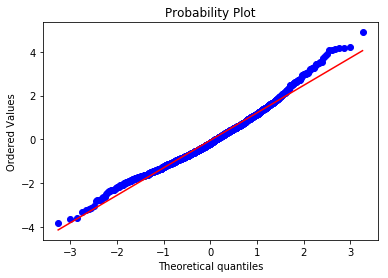

In [49]:
residuals = y_test - y_pred_test
stats.probplot(residuals,dist='norm',plot=plt)

In [50]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [51]:
def vif(X):
    variables=list(range(X.shape[1]))
    vif=pd.DataFrame()
    vif['vif'] = [variance_inflation_factor(X.iloc[:, variables].values, ix) for ix in range(X.iloc[:, variables].shape[1])]
    vif['column'] = X.columns
    return vif.sort_values('vif',ascending=False)

In [52]:
X.shape

(5000, 190)

In [101]:
vif(X)

,vif,column
12,85.120789,longmon
13,80.158355,longten
131,72.162655,commute_1.0
48,70.096079,commutecat_1.0
7,47.482899,ed
8,37.587282,equipmon
67,37.200990,equip_0.0
17,34.941892,tollmon
16,30.638968,tenure
45,30.222390,marital_1.0


In [54]:
X.drop(['cardfee_0.0'],axis=1,inplace=True)

In [56]:
X.drop(['hometype_4.0'],axis=1,inplace=True)

In [58]:
X.drop(['polparty_0.0'],axis=1,inplace=True)

In [60]:
X.drop(['homeown_0.0'],axis=1,inplace=True)

In [62]:
X.drop(['response_02_0.0'],axis=1,inplace=True)

In [64]:
X.drop(['ebill_0.0'],axis=1,inplace=True)

In [66]:
X.drop(['owngame_0.0'],axis=1,inplace=True)

In [68]:
X.drop(['callcard_0.0'],axis=1,inplace=True)

In [70]:
X.drop(['commutemotorcycle_1.0'],axis=1,inplace=True)

In [72]:
X.drop(['commutecat_5.0'],axis=1,inplace=True)

In [74]:
X.drop(['commuterail_0.0'],axis=1,inplace=True)

In [76]:
X.drop(['tollfree_1.0'],axis=1,inplace=True)

In [78]:
X.drop(['commutecarpool_0.0'],axis=1,inplace=True)

In [80]:
X.drop(['pager_1.0'],axis=1,inplace=True)

In [82]:
X.drop(['polcontrib_0.0'],axis=1,inplace=True)

In [84]:
X.drop(['commutebus_0.0'],axis=1,inplace=True)

In [86]:
X.drop(['commutebike_1.0'],axis=1,inplace=True)

In [88]:
X.drop(['equip_1.0'],axis=1,inplace=True)

In [90]:
X.drop(['response_01_1.0'],axis=1,inplace=True)

In [92]:
X.drop(['commutecar_0.0'],axis=1,inplace=True)

In [94]:
X.drop(['commutewalk_0.0'],axis=1,inplace=True)

In [96]:
X.drop(['response_03_1.0'],axis=1,inplace=True)

In [98]:
X.drop(['marital_0.0'],axis=1,inplace=True)

In [100]:
X.drop(['spousedcat_-1.0'],axis=1,inplace=True)

In [102]:
X.drop(['longmon'],axis=1,inplace=True)

In [104]:
X.drop(['commute_1.0'],axis=1,inplace=True)

In [106]:
X.drop(['ed'],axis=1,inplace=True)

In [108]:
X.drop(['equipmon'],axis=1,inplace=True)

In [110]:
X.drop(['tollmon'],axis=1,inplace=True)

In [112]:
X.drop(['tenure'],axis=1,inplace=True)

In [114]:
X.drop(['marital_1.0'],axis=1,inplace=True)

In [116]:
X.drop(['carbought_0.0'],axis=1,inplace=True)

In [118]:
X.drop(['commutecat_3.0'],axis=1,inplace=True)

In [120]:
X.drop(['age'],axis=1,inplace=True)

In [122]:
X.drop(['cardmon'],axis=1,inplace=True)

In [124]:
X.drop(['hourstv'],axis=1,inplace=True)

In [126]:
X.drop(['income'],axis=1,inplace=True)

In [128]:
X.drop(['response_01_0.0'],axis=1,inplace=True)

In [130]:
X.drop(['wiremon'],axis=1,inplace=True)

In [132]:
X.drop(['equip_0.0'],axis=1,inplace=True)

In [134]:
X.drop(['carditems'],axis=1,inplace=True)

In [136]:
X.drop(['commutecat_1.0'],axis=1,inplace=True)

In [138]:
X.drop(['response_03_0.0'],axis=1,inplace=True)

In [140]:
X.drop(['commutemotorcycle_0.0'],axis=1,inplace=True)


In [142]:
X.shape,y.shape

((5000, 146), (5000,))

In [143]:
from scipy.stats import boxcox

scaled_y,_=boxcox(y)


from sklearn.preprocessing import StandardScaler

scale = StandardScaler()
scaled_X = scale.fit_transform(X)

C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [144]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(scaled_X,scaled_y)

In [145]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [146]:
y_pred_train = lr.predict(X_train)

print("The r2 for train data : {}".format(metrics.r2_score(y_train,y_pred_train)))
print("The mean_squared_error for train data : {}".format(metrics.mean_squared_error(y_train,y_pred_train)))


The r2 for train data : 0.39543636274368643
The mean_squared_error for train data : 2.246147407148074


In [147]:
y_pred_test = lr.predict(X_test)

print("The r2 for test data : {}".format(metrics.r2_score(y_test,y_pred_test)))
print("The mean_squared_error for test data : {}".format(metrics.mean_squared_error(y_test,y_pred_test)))


The r2 for test data : 0.35085040450554705
The mean_squared_error for test data : 2.381842529166567


((array([-3.26137628, -3.00096962, -2.85595591, ...,  2.85595591,
          3.00096962,  3.26137628]),
  array([-6.09677029, -5.25305837, -4.49915381, ...,  5.08627694,
          5.31502859,  5.40197072])),
 (1.5393379325922927, 0.09948051630865408, 0.9972138144156064))

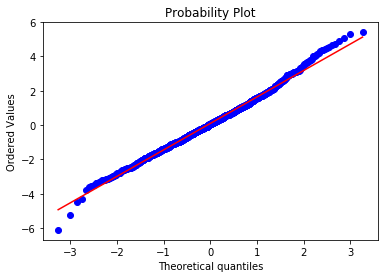

In [148]:
residuals = y_test - y_pred_test
stats.probplot(residuals,dist='norm',plot=plt)

In [149]:
#using RFE for feature selection 

from sklearn.feature_selection import RFE

rfe=RFE(lr,n_features_to_select=20)       #i am giving 20 so as to select 20 variables to be included in the dataset
imp_features=rfe.fit_transform(X,y)

In [150]:
a=rfe.support_.tolist()
b=X.columns
c=[]
for i in range(len(a)):
    if(a[i]==True):
        c.append(i)
        
b[c]      

Index(['card2items', 'card2tenure_8.0', 'card2tenure_13.0', 'card_4.0',
       'card_5.0', 'internet_4.0', 'cardtenure_28.0', 'cardtenure_36.0',
       'cardtenure_37.0', 'edcat_4.0', 'employ_9.0', 'employ_26.0',
       'employ_33.0', 'employ_39.0', 'address_1.0', 'address_18.0',
       'address_20.0', 'address_25.0', 'address_29.0', 'jobcat_3.0'],
      dtype='object')

In [151]:
X_train,X_test,y_train,y_test = train_test_split(imp_features,scaled_y)

In [152]:
lr.fit(X_train,y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [153]:
y_pred_train = lr.predict(X_train)

print("The r2 for train data : {}".format(metrics.r2_score(y_train,y_pred_train)))
print("The mean_squared_error for train data : {}".format(metrics.mean_squared_error(y_train,y_pred_train)))


The r2 for train data : 0.27923040339924576
The mean_squared_error for train data : 2.638779976512828


In [154]:
y_pred_test = lr.predict(X_test)

print("The r2 for test data : {}".format(metrics.r2_score(y_test,y_pred_test)))
print("The mean_squared_error for test data : {}".format(metrics.mean_squared_error(y_test,y_pred_test)))


The r2 for test data : 0.2629823438378788
The mean_squared_error for test data : 2.8279551687565925


((array([-3.26137628, -3.00096962, -2.85595591, ...,  2.85595591,
          3.00096962,  3.26137628]),
  array([-6.76660467, -5.67032331, -5.31964554, ...,  6.16429247,
          8.45646565,  9.39272831])),
 (1.6683556342408994, 0.04038190487334614, 0.9901120608177985))

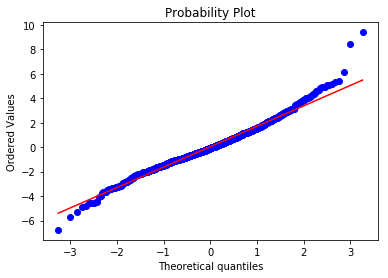

In [155]:
residuals = y_test - y_pred_test
stats.probplot(residuals,dist='norm',plot=plt)